# Numpy and Data

Congrats on making it this far; let's dive into some _real_ numbers in Python!

In [1]:
import numpy as np

x = [1,2,3]
x

[1, 2, 3]

In [2]:
x + 1

TypeError: can only concatenate list (not "int") to list

In [3]:
[element + 1 for element in x]

[2, 3, 4]

In [4]:
x = np.array([1,2,3])
x

array([1, 2, 3])

In [5]:
x + 1

array([2, 3, 4])

In [6]:
x * 4

array([ 4,  8, 12])

In [7]:
x * x

array([1, 4, 9])

In [8]:
x ** 2

array([1, 4, 9])

In [9]:
x.shape

(3,)

In [10]:
W = np.matrix([
    [1,2,3],
    [4,5,6],
    [7,8,9],
])
W

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [11]:
W.T

matrix([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

In [12]:
np.transpose(W)

matrix([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

In [13]:
np.sum(W)

45

In [14]:
np.sum(W, axis=0)

matrix([[12, 15, 18]])

In [15]:
np.sum(W, axis=1)

matrix([[ 6],
        [15],
        [24]])

In [16]:
x * W

matrix([[30, 36, 42]])

# Indexing

We can index, splice, split, etc...

In [17]:
W

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [18]:
W[1, 1]

5

In [19]:
W[0:3, 0]

matrix([[1],
        [4],
        [7]])

In [25]:
w_slice = W[:, 0]

In [26]:
W[:, :]

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [27]:
W = np.random.randn(5, 5)
W.shape

(5, 5)

In [28]:
W

array([[ 0.65687114, -0.3981473 , -1.09593781, -0.89767782, -0.32404261],
       [ 1.04018056,  0.73390258,  0.11602387,  1.1498869 , -0.84546299],
       [-1.04530384,  0.29788556,  0.72599738, -0.283727  , -1.41092253],
       [ 0.79116886,  0.27736265, -0.15645955,  1.80227069,  0.46210572],
       [-0.49458415,  0.69970518, -0.81458618,  0.28514397,  0.86235783]])

In [32]:
W[-2:, :]
#W[3:, :]

array([[ 0.79116886,  0.27736265, -0.15645955,  1.80227069,  0.46210572],
       [-0.49458415,  0.69970518, -0.81458618,  0.28514397,  0.86235783]])

In [33]:
W.flatten()

array([ 0.65687114, -0.3981473 , -1.09593781, -0.89767782, -0.32404261,
        1.04018056,  0.73390258,  0.11602387,  1.1498869 , -0.84546299,
       -1.04530384,  0.29788556,  0.72599738, -0.283727  , -1.41092253,
        0.79116886,  0.27736265, -0.15645955,  1.80227069,  0.46210572,
       -0.49458415,  0.69970518, -0.81458618,  0.28514397,  0.86235783])

In [34]:
W.flatten().shape

(25,)

# Plotting

Let's start plotting some stuff!

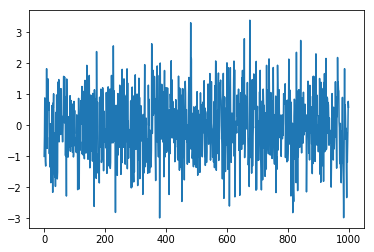

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt

x = np.random.randn(1000)
plt.plot(x);

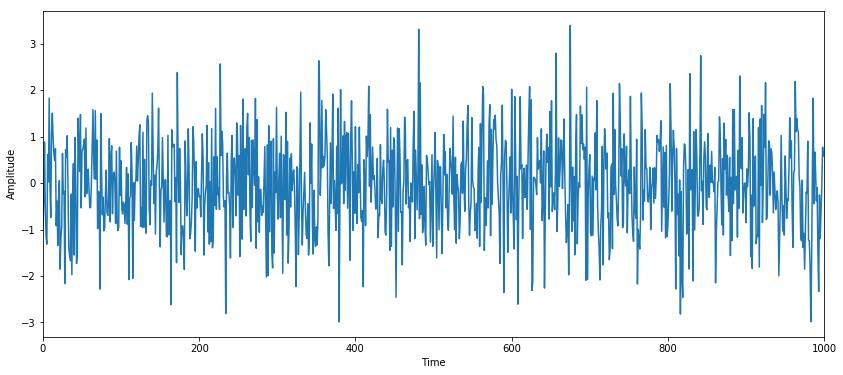

In [39]:
def xplot(x):
    plt.figure(figsize=(14,6))
    plt.plot(x)
    plt.xlim(0, len(x))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

xplot(x)

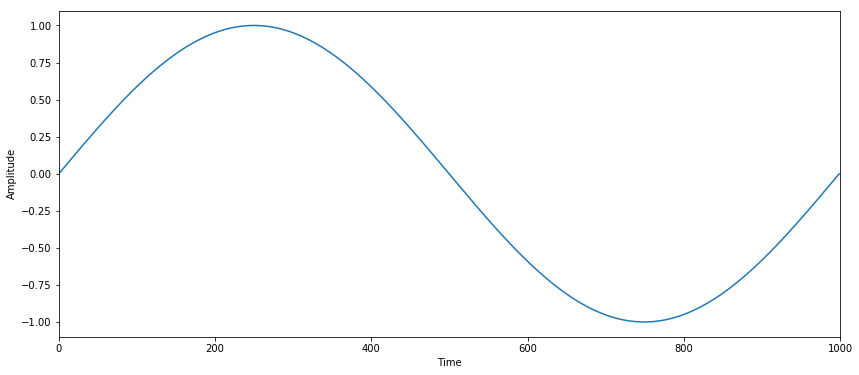

In [42]:
s = np.sin(np.linspace(0, 2*np.pi, len(x)))
xplot(s)

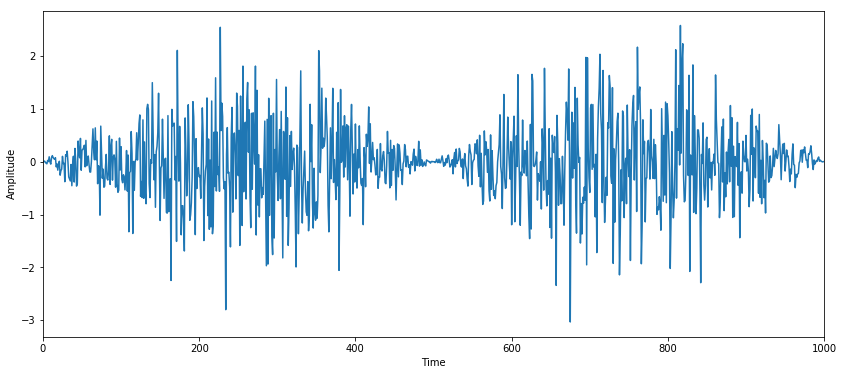

In [43]:
xplot(s * x)

We can do things like find the places where `x > 0`:

In [44]:
y = s * x

In [46]:
y > 1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

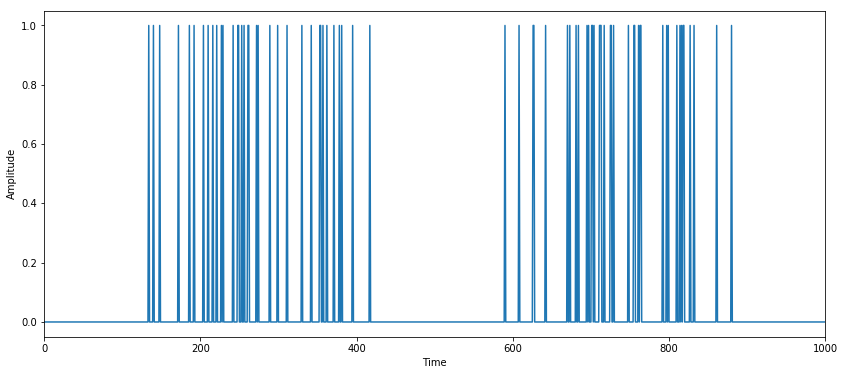

In [47]:
xplot(y > 1)

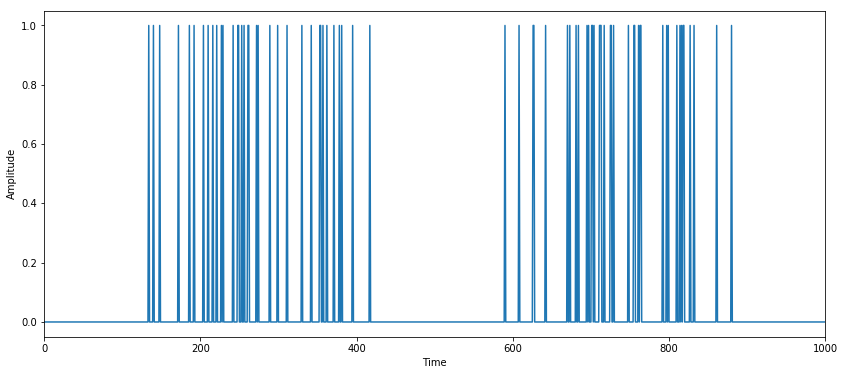

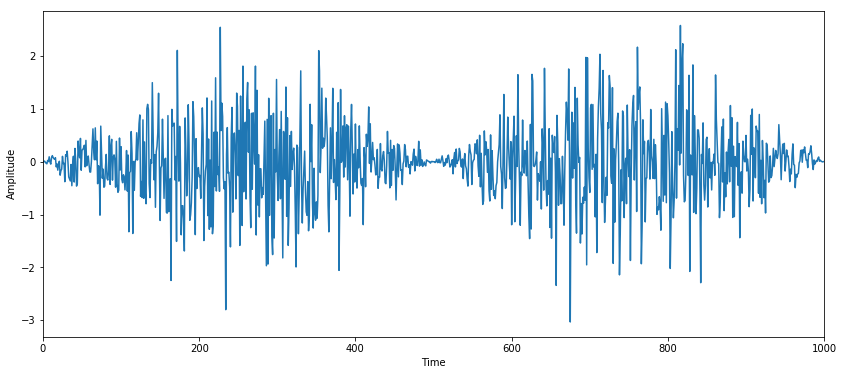

In [48]:
xplot(y > 1)
xplot(y)

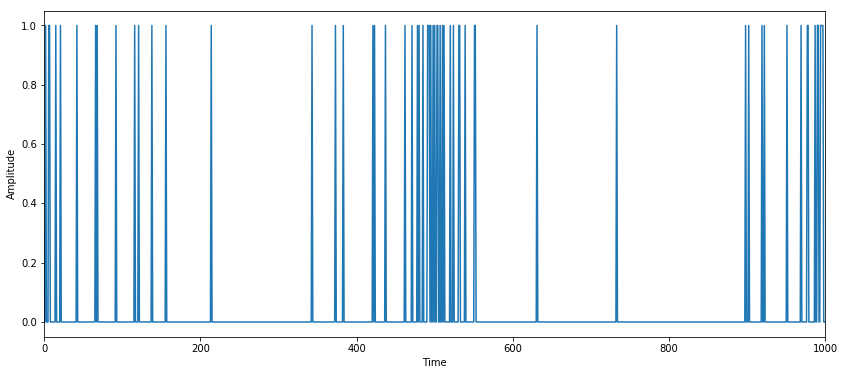

In [51]:
small_bool_array = (y > 0) & (y < 0.05)
xplot(small_bool_array)

In [56]:
small_idxs = np.where((y < 0) & (y > -4))
small_idxs

(array([  1,   3,   4,   5,   9,  10,  17,  18,  19,  20,  22,  23,  24,
         26,  27,  28,  32,  33,  34,  35,  36,  37,  38,  40,  43,  44,
         49,  54,  56,  59,  60,  61,  62,  70,  71,  72,  73,  76,  77,
         78,  79,  80,  82,  83,  84,  86,  89,  93,  95,  96,  97,  99,
        101, 102, 103, 104, 105, 106, 108, 110, 111, 112, 115, 117, 118,
        125, 126, 127, 129, 131, 132, 136, 137, 139, 142, 144, 149, 150,
        151, 152, 155, 158, 159, 161, 162, 163, 164, 169, 171, 174, 176,
        177, 178, 179, 180, 181, 184, 185, 188, 189, 190, 191, 195, 197,
        198, 199, 200, 201, 202, 206, 207, 208, 209, 211, 213, 215, 217,
        218, 220, 222, 224, 225, 226, 231, 232, 233, 234, 237, 238, 239,
        240, 243, 247, 250, 252, 254, 255, 257, 260, 265, 266, 268, 271,
        273, 275, 277, 278, 279, 280, 281, 282, 285, 286, 288, 290, 293,
        294, 296, 298, 300, 301, 304, 306, 307, 310, 312, 314, 315, 317,
        319, 322, 323, 324, 327, 328, 331, 332, 333

In [62]:
x = np.array([0, 1, 0, 0, 1, 2, 3, 2, 1])

nonzero_idxs = np.where(x > 0)
x[nonzero_idxs]

array([1, 1, 2, 3, 2, 1])

In [65]:
list(x)

[0, 1, 0, 0, 1, 2, 3, 2, 1]

In [ ]:
# We can even index into x with those indices!
small_values = x[small_idxs]
small_values

# Loading data

Let's download a `.csv` file using `requests`, load it into memory using `numpy`, then plot it using `matplotlib`.

We'll use `requests.get()` to download the file, `open()` and `write()` to write it out to a file, `np.genfromtxt()` to load it in, then `plt.scatter()` to plot it.

In [66]:
import requests
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"

# Use requests to download
r = requests.get(url)

# Grab the csv data from r.text
csv_data = r.text
csv_data

'sepal_length,sepal_width,petal_length,petal_width,species\n5.1,3.5,1.4,0.2,setosa\n4.9,3,1.4,0.2,setosa\n4.7,3.2,1.3,0.2,setosa\n4.6,3.1,1.5,0.2,setosa\n5,3.6,1.4,0.2,setosa\n5.4,3.9,1.7,0.4,setosa\n4.6,3.4,1.4,0.3,setosa\n5,3.4,1.5,0.2,setosa\n4.4,2.9,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5.4,3.7,1.5,0.2,setosa\n4.8,3.4,1.6,0.2,setosa\n4.8,3,1.4,0.1,setosa\n4.3,3,1.1,0.1,setosa\n5.8,4,1.2,0.2,setosa\n5.7,4.4,1.5,0.4,setosa\n5.4,3.9,1.3,0.4,setosa\n5.1,3.5,1.4,0.3,setosa\n5.7,3.8,1.7,0.3,setosa\n5.1,3.8,1.5,0.3,setosa\n5.4,3.4,1.7,0.2,setosa\n5.1,3.7,1.5,0.4,setosa\n4.6,3.6,1,0.2,setosa\n5.1,3.3,1.7,0.5,setosa\n4.8,3.4,1.9,0.2,setosa\n5,3,1.6,0.2,setosa\n5,3.4,1.6,0.4,setosa\n5.2,3.5,1.5,0.2,setosa\n5.2,3.4,1.4,0.2,setosa\n4.7,3.2,1.6,0.2,setosa\n4.8,3.1,1.6,0.2,setosa\n5.4,3.4,1.5,0.4,setosa\n5.2,4.1,1.5,0.1,setosa\n5.5,4.2,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5,3.2,1.2,0.2,setosa\n5.5,3.5,1.3,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n4.4,3,1.3,0.2,setosa\n5.1,3.4,1.5,0.2,setosa\n5,3.

In [67]:
# Write it out to /tmp/iris.csv
with open("/tmp/iris.csv", "w") as f:
    f.write(csv_data)
    
# Print it out so we can see what it looks like
print(csv_data)

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,setosa
4.9,3,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa
5.4,3.7,1.5,0.2,setosa
4.8,3.4,1.6,0.2,setosa
4.8,3,1.4,0.1,setosa
4.3,3,1.1,0.1,setosa
5.8,4,1.2,0.2,setosa
5.7,4.4,1.5,0.4,setosa
5.4,3.9,1.3,0.4,setosa
5.1,3.5,1.4,0.3,setosa
5.7,3.8,1.7,0.3,setosa
5.1,3.8,1.5,0.3,setosa
5.4,3.4,1.7,0.2,setosa
5.1,3.7,1.5,0.4,setosa
4.6,3.6,1,0.2,setosa
5.1,3.3,1.7,0.5,setosa
4.8,3.4,1.9,0.2,setosa
5,3,1.6,0.2,setosa
5,3.4,1.6,0.4,setosa
5.2,3.5,1.5,0.2,setosa
5.2,3.4,1.4,0.2,setosa
4.7,3.2,1.6,0.2,setosa
4.8,3.1,1.6,0.2,setosa
5.4,3.4,1.5,0.4,setosa
5.2,4.1,1.5,0.1,setosa
5.5,4.2,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa
5,3.2,1.2,0.2,setosa
5.5,3.5,1.3,0.2,setosa
4.9,3.1,1.5,0.1,setosa
4.4,3,1.3,0.2,setosa
5.1,3.4,1.5,0.2,setosa
5,3.5,1.3,0.3,setosa
4.5,2.3,1.3,0.3,setosa
4.

In [71]:
np.genfromtxt("/tmp/iris.csv", delimiter=',', skip_header=1)

array([[ 5.1,  3.5,  1.4,  0.2,  nan],
       [ 4.9,  3. ,  1.4,  0.2,  nan],
       [ 4.7,  3.2,  1.3,  0.2,  nan],
       [ 4.6,  3.1,  1.5,  0.2,  nan],
       [ 5. ,  3.6,  1.4,  0.2,  nan],
       [ 5.4,  3.9,  1.7,  0.4,  nan],
       [ 4.6,  3.4,  1.4,  0.3,  nan],
       [ 5. ,  3.4,  1.5,  0.2,  nan],
       [ 4.4,  2.9,  1.4,  0.2,  nan],
       [ 4.9,  3.1,  1.5,  0.1,  nan],
       [ 5.4,  3.7,  1.5,  0.2,  nan],
       [ 4.8,  3.4,  1.6,  0.2,  nan],
       [ 4.8,  3. ,  1.4,  0.1,  nan],
       [ 4.3,  3. ,  1.1,  0.1,  nan],
       [ 5.8,  4. ,  1.2,  0.2,  nan],
       [ 5.7,  4.4,  1.5,  0.4,  nan],
       [ 5.4,  3.9,  1.3,  0.4,  nan],
       [ 5.1,  3.5,  1.4,  0.3,  nan],
       [ 5.7,  3.8,  1.7,  0.3,  nan],
       [ 5.1,  3.8,  1.5,  0.3,  nan],
       [ 5.4,  3.4,  1.7,  0.2,  nan],
       [ 5.1,  3.7,  1.5,  0.4,  nan],
       [ 4.6,  3.6,  1. ,  0.2,  nan],
       [ 5.1,  3.3,  1.7,  0.5,  nan],
       [ 4.8,  3.4,  1.9,  0.2,  nan],
       [ 5. ,  3. ,  1.6,

In [72]:
# We want to load this into a float array, so we need to convert these label names to a float
label_map = {
    b'setosa': 0.0,
    b'versicolor': 1.0,
    b'virginica': 2.0,
}

# Convert column 4 by taking each entry, and passing it through label_map
converters = {
    4: lambda entry: label_map[entry],
}

iris_data = np.genfromtxt("/tmp/iris.csv", delimiter=',', skip_header=1, converters=converters)
iris_data

array([[ 5.1,  3.5,  1.4,  0.2,  0. ],
       [ 4.9,  3. ,  1.4,  0.2,  0. ],
       [ 4.7,  3.2,  1.3,  0.2,  0. ],
       [ 4.6,  3.1,  1.5,  0.2,  0. ],
       [ 5. ,  3.6,  1.4,  0.2,  0. ],
       [ 5.4,  3.9,  1.7,  0.4,  0. ],
       [ 4.6,  3.4,  1.4,  0.3,  0. ],
       [ 5. ,  3.4,  1.5,  0.2,  0. ],
       [ 4.4,  2.9,  1.4,  0.2,  0. ],
       [ 4.9,  3.1,  1.5,  0.1,  0. ],
       [ 5.4,  3.7,  1.5,  0.2,  0. ],
       [ 4.8,  3.4,  1.6,  0.2,  0. ],
       [ 4.8,  3. ,  1.4,  0.1,  0. ],
       [ 4.3,  3. ,  1.1,  0.1,  0. ],
       [ 5.8,  4. ,  1.2,  0.2,  0. ],
       [ 5.7,  4.4,  1.5,  0.4,  0. ],
       [ 5.4,  3.9,  1.3,  0.4,  0. ],
       [ 5.1,  3.5,  1.4,  0.3,  0. ],
       [ 5.7,  3.8,  1.7,  0.3,  0. ],
       [ 5.1,  3.8,  1.5,  0.3,  0. ],
       [ 5.4,  3.4,  1.7,  0.2,  0. ],
       [ 5.1,  3.7,  1.5,  0.4,  0. ],
       [ 4.6,  3.6,  1. ,  0.2,  0. ],
       [ 5.1,  3.3,  1.7,  0.5,  0. ],
       [ 4.8,  3.4,  1.9,  0.2,  0. ],
       [ 5. ,  3. ,  1.6,

In [73]:
iris_data[:, 0]

array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
        4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
        4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
        5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
        5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
        5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
        5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
        6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
        5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
        5.7,  6.3,  5.8,  7.1,  6.3,  6.5,  7.6,  4.9,  7.3,  6.7,  7.2,
        6.5,  6.4,  6.8,  5.7,  5.8,  6.4,  6.5,  7.7,  7.7,  6. ,  6.9,
        5.6,  7.7,  6.3,  6.7,  7.2,  6.2,  6.1,  6.4,  7.2,  7.4,  7.9,
        6.4,  6.3,  6.1,  7.7,  6.3,  6.4,  6. ,  6.9,  6.7,  6.9,  5.8,
        6.8,  6.7,  6.7,  6.3,  6.5,  6.2,  5.9])

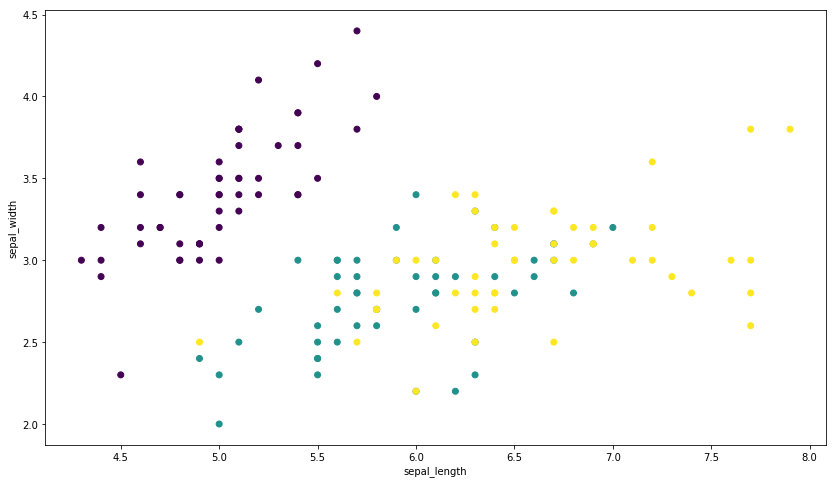

In [74]:
plt.figure(figsize=(14, 8))
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=iris_data[:, 4])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

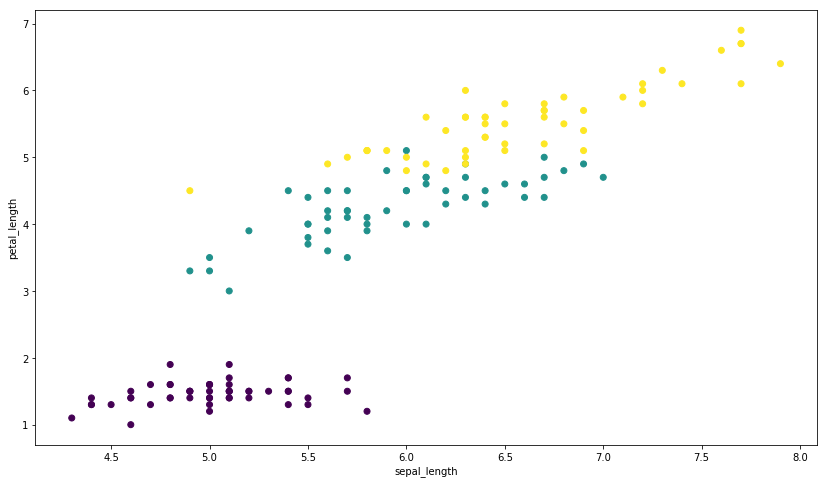

In [75]:
plt.figure(figsize=(14, 8))
plt.scatter(iris_data[:, 0], iris_data[:, 2], c=iris_data[:, 4])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')

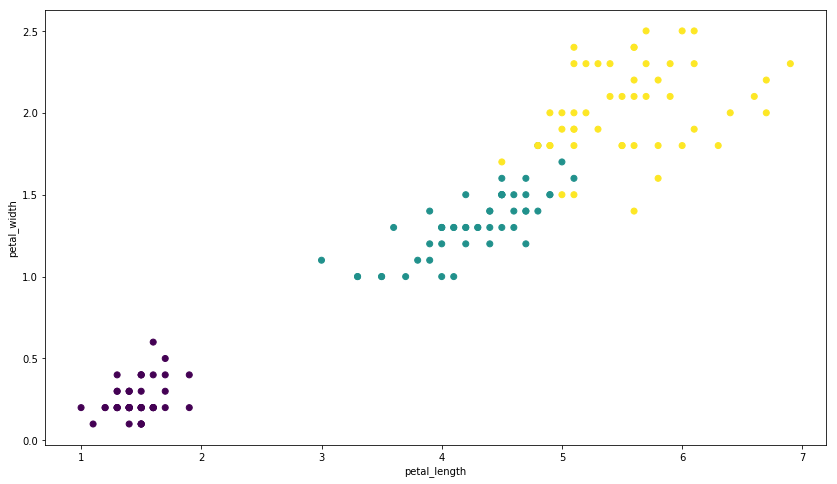

In [76]:
plt.figure(figsize=(14, 8))
plt.scatter(iris_data[:, 2], iris_data[:, 3], c=iris_data[:, 4])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

# Check 0

We are going to compute the "centroid" of each type of Iris.  The "centroid" of a blob of data finds the mean value along each axis.  You are then going to scatter plot the data just as above, but you will also plot the calculated centroids along the same two dimensions.  The output should look something like:

In [84]:
setosas = []
middle_ones = []
virginias = []

for idx in range(iris_data.shape[0]):
    flower_data = iris_data[idx, :]
    
    if flower_data[4] == 0:
        setosas += [flower_data]
    if flower_data[4] == 1:
        middle_ones += [flower_data]
    if flower_data[4] == 2:
        virginias += [flower_data]

np.array(setosas)

array([[ 5.1,  3.5,  1.4,  0.2,  0. ],
       [ 4.9,  3. ,  1.4,  0.2,  0. ],
       [ 4.7,  3.2,  1.3,  0.2,  0. ],
       [ 4.6,  3.1,  1.5,  0.2,  0. ],
       [ 5. ,  3.6,  1.4,  0.2,  0. ],
       [ 5.4,  3.9,  1.7,  0.4,  0. ],
       [ 4.6,  3.4,  1.4,  0.3,  0. ],
       [ 5. ,  3.4,  1.5,  0.2,  0. ],
       [ 4.4,  2.9,  1.4,  0.2,  0. ],
       [ 4.9,  3.1,  1.5,  0.1,  0. ],
       [ 5.4,  3.7,  1.5,  0.2,  0. ],
       [ 4.8,  3.4,  1.6,  0.2,  0. ],
       [ 4.8,  3. ,  1.4,  0.1,  0. ],
       [ 4.3,  3. ,  1.1,  0.1,  0. ],
       [ 5.8,  4. ,  1.2,  0.2,  0. ],
       [ 5.7,  4.4,  1.5,  0.4,  0. ],
       [ 5.4,  3.9,  1.3,  0.4,  0. ],
       [ 5.1,  3.5,  1.4,  0.3,  0. ],
       [ 5.7,  3.8,  1.7,  0.3,  0. ],
       [ 5.1,  3.8,  1.5,  0.3,  0. ],
       [ 5.4,  3.4,  1.7,  0.2,  0. ],
       [ 5.1,  3.7,  1.5,  0.4,  0. ],
       [ 4.6,  3.6,  1. ,  0.2,  0. ],
       [ 5.1,  3.3,  1.7,  0.5,  0. ],
       [ 4.8,  3.4,  1.9,  0.2,  0. ],
       [ 5. ,  3. ,  1.6,

In [102]:
np.where(iris_data[:, 4] == 0)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [96]:
x = (1, 2)
x

(1, 2)

In [103]:
setosa_idxs = np.where(iris_data[:, 4] == 0)[0]
versicolor_idxs = np.where(iris_data[:, 4] == 1)[0]
virginica_idxs = np.where(iris_data[:, 4] == 2)[0]

setosa_data = iris_data[setosa_idxs, 0:4]
versicolor_data = iris_data[versicolor_idxs, 0:4]
virginica_data = iris_data[virginica_idxs, 0:4]


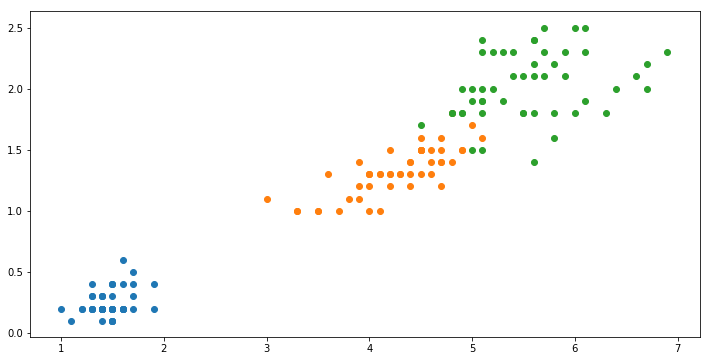

In [109]:
# Plot it to make sure we're making sense
plt.figure(figsize=(12, 6))
plt.scatter(setosa_data[:, 2], setosa_data[:, 3])
plt.scatter(versicolor_data[:, 2], versicolor_data[:, 3])
plt.scatter(virginica_data[:, 2], virginica_data[:, 3])

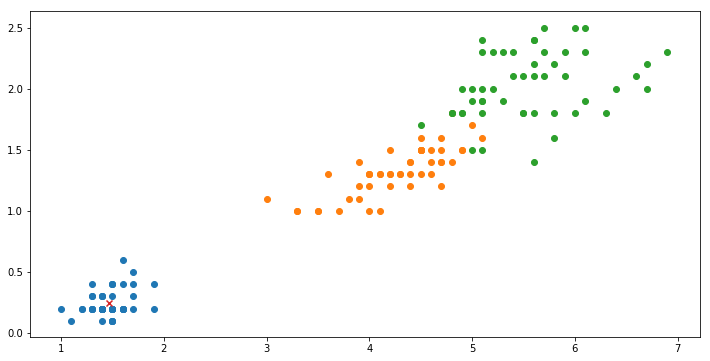

In [114]:
y_mean = sum(setosa_data[:,3])/setosa_data.shape[0]
x_mean = sum(setosa_data[:,2])/setosa_data.shape[0]

plt.figure(figsize=(12, 6))
plt.scatter(setosa_data[:, 2], setosa_data[:, 3])
plt.scatter(versicolor_data[:, 2], versicolor_data[:, 3])
plt.scatter(virginica_data[:, 2], virginica_data[:, 3])
plt.scatter(x_mean, y_mean, marker='x')

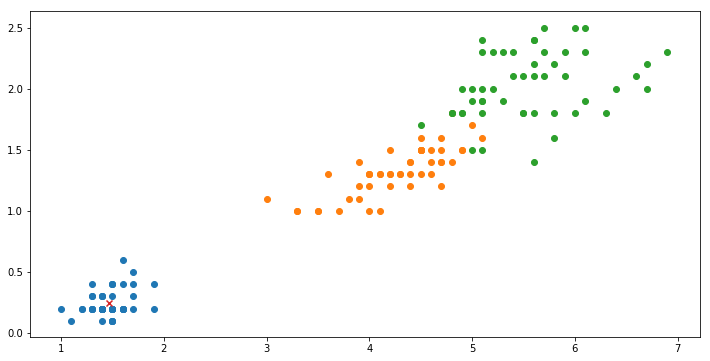

In [116]:
setosa_means = np.mean(setosa_data, axis=0)

plt.figure(figsize=(12, 6))
plt.scatter(setosa_data[:, 2], setosa_data[:, 3])
plt.scatter(versicolor_data[:, 2], versicolor_data[:, 3])
plt.scatter(virginica_data[:, 2], virginica_data[:, 3])
plt.scatter(setosa_means[2], setosa_means[3], marker='x')

In [120]:
W = np.random.randn(3, 5)
W

array([[-0.35292047,  0.0744851 ,  0.62277444,  0.50151937, -0.13533069],
       [-0.48741395,  1.33180966, -0.50112295,  0.74092172,  2.73023638],
       [-0.19587287,  0.81503712,  0.4583676 , -0.31856782,  0.65638669]])

In [ ]:
# Example solution



















# Find indices of each iris type's data



# use indices to isolate just that particular iris' data
setosa_data = iris_data[setosa_idxs, 0:4]
versicolor_data = iris_data[versicolor_idxs, 0:4]
virginica_data = iris_data[virginica_idxs, 0:4]


# Calculate centroids
setosa_centroid = np.mean(setosa_data, axis=0)
versicolor_centroid = np.mean(versicolor_data, axis=0)
virginica_centroid = np.mean(virginica_data, axis=0)

# Plot centroids
plt.scatter(setosa_centroid[2], setosa_centroid[3], marker='x')
plt.scatter(versicolor_centroid[2], versicolor_centroid[3], marker='x')
plt.scatter(virginica_centroid[2], virginica_centroid[3], marker='x')